![Descrição da imagem](files/banner_png.png)

# Extração de cartas Liga magic
### Verificação de influências das variáveis no valor da carta
Trabalho realizado por: 
- Camila Niederauer 22302557
- Hermes Winarski 22352985
- Matheus Nery 22309707
- Rafael Mascarenhas 22304454

#### 1. Introdução
Neste trabalho, analisaremos o mercado de cardas da edição Senhor do Anéis do jogo Magic: the Gathering no site de e-commerce Liga Magic. A escolha da edição se deu pela alta popularidade e alta quantidade de cartas que foram lançadas somente nesta edição. 

Afim de encorpar o trabalho com uma análise histórica, também será realizada uma análise na variação do preço da eletricidade ao longo do dia na Espanha. Utilizamos o site 'https://tarifaluzhora.es/' como fonte confiável dos dados. Nosso objetivo principal foi investigar como os preços da eletricidade oscilam durante as 24 horas do dia.

Para coletar os dados, utilizaremos o Selenium para extrair os links das cartas e o 
Cloudscraper para extrair as informações de cada carta.
- As seguintes variaveis estão sendo extraidas de cada card:
    - nome (identificação da carta)
    - cor (cor do card, ou se é multicolorido)
    - tipo (tipo de carta: feitiço, criatura, terreno, etc)
    - avaliação (nota média de avaliação do card pelos usuários)
    - formatos (formatos validos dos card)
    - raridade (raidade da carta: comum, incomum, raro ou mitico raro)
    - menor valor (normal e foil)
    - valor médio (normal e foil)
    - valor máximo (normal e foil)
    - imagem (imagem da carta, com o intuido de apresentação gráfica)
##### Objetivos
- Identificar as variáveis que influenciam o preço das cartas;
- Comparar o preço das cartas foil com as cartas normais;
- Verificar se existe a possivilidade de aproveitar oporunidades de mercado com base na análise dos preços;
#### 2. Referencial Teórico
- A recuperação da informação a partir do webscraping demonstra grande poder dentro do mundo digital. Onde o mar de dados digitais já engole os usuários dentro de seus pequenos navios.
- No trabalho foi necessário a utilização de dois pacotes para o web scrapping: Selenium e Cloudscraper. Devido a página com links dos cards capturados necessitar de uma rolagem para baixo para carregar todos os cards, e também ao bloqueio de requisições utilizando a biblioteca request.
- Após a coleta dos dados através do webscraping, realizamos uma organização e limpeza dos dados para garantir sua qualidade e confiabilidade. Em seguida, utilizamos a bilioteca Matplotlib que nos ajudou na parte de visualização de dados, gerando gráfios para apresentar os resultados de forma clara.
#### 3. Desenvolvimento e Código

In [ ]:
# Extrair os links onde serão extraidas as informações de cada carta
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import requests  # Opcional
import time

def scroll_down(driver):
    """
    Função para realizar scroll até o final da página.

    Args:
        driver: Instância do Selenium WebDriver.
    """
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        time.sleep(2)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        new_height = driver.execute_script("return document.body.scrollHeight")
        if last_height == new_height:
            break
        last_height = new_height

def get_card_urls(driver):
    """
    Função para extrair as URLs dos cards da página.

    Args:
        driver: Instância do Selenium WebDriver.

    Returns:
        Lista de URLs de cards.
    """
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    card_links = []
    for card_element in soup.find_all('div', class_='layer-hover'):
        
        card_url = card_element.find('a')['href']
        card_links.append(card_url)

    return card_links

def main():
    # Definindo o driver do navegador (Chrome no exemplo)
    driver = webdriver.Chrome()

    # Abrindo a página de pesquisa
    driver.get('https://www.ligamagic.com.br/?view=cards/search&card=edid=480196%20ed=ltr')

    # Fazendo scroll até o final da página
    scroll_down(driver)

    # Extraindo as URLs dos cards
    card_urls = get_card_urls(driver)
    #print(card_urls)

    # Imprimindo as URLs na tela
    #for url in card_urls:
    #    print(url)

    # (Opcional) Verificando se as URLs estão acessíveis
    #for url in card_urls:
    #    response = requests.get(url)
    #    if response.status_code != 200:
    #        print(f"Erro ao acessar URL: {url}")

    # Fechando o navegador
    driver.quit()
    return card_urls

if __name__ == "__main__":
    urls = main()

In [ ]:
import random
# Criando urls completas do site
urls_lm = ['https://www.ligamagic.com.br/' + url for url in urls]
random.shuffle(urls)
urls_lm

In [ ]:
#Extrair as informações da carta com o intuito de descobrir tendencias de valor nos cards
from bs4 import BeautifulSoup
import pandas as pd
import cloudscraper
scraper = cloudscraper.create_scraper()
  
def process_card_page(url):
  """
  Processa uma página de card e retorna um dicionário com os dados.

  Args:
      url: URL da página do card.

  Returns:
      Dicionário contendo os dados extraídos da página.
  """
#try:
# Fazer a requisição GET utilizando o scraper
  response = scraper.get(url)

  #response = requests.get(url)
  response.raise_for_status()  # Verifica se a requisição foi bem sucedida
  # Criar o objeto BeautifulSoup para analisar o conteúdo da página
  soup = BeautifulSoup(response.content, 'html.parser')
  # Extração de dados (adapte os seletores CSS se necessário)
  nome_carta = soup.find('p', class_='nome-principal').text.strip()
  cor = soup.find('div', class_='col-lg-6').text.strip().split(":")[1].replace(" ", "")
  tipo = soup.find('div', class_='col-lg-6 html-typecard').text.strip().split(":")[1][1:]
  avaliacao = soup.find('font', class_='layer-pool-media').text.strip().split("/")[0]
  #formatos = soup.find('div', class_='col-lg-12 col-lg-crop').text.strip()
  raridade = soup.find('div', class_='col-lg-5').text.strip().split(":")[1].replace(" ", "")
  precos = soup.find('div', class_='precos-edicoes').text.strip()
  #print(precos)
  min_preco = precos.split("R$")[1].replace(" ", "")
  med_preco = precos.split("R$")[2].replace(" ", "")
  max_preco = precos.split("R$")[3].replace(" ", "")
  try:
    min_preco_foil = precos.split("R$")[4].replace(" ", "")
    med_preco_foil = precos.split("R$")[5].replace(" ", "")
    max_preco_foil = precos.split("R$")[6].replace(" ", "")
  except:
    min_preco_foil = 0
    med_preco_foil = 0
    max_preco_foil = 0
  imagem = soup.find('div', class_='card-image-src')
  # Retorna dicionário com os dados extraídos
  linha = pd.DataFrame({
    "nome_carta": [nome_carta],
    "cor": [cor],
    "tipo": [tipo],
    "avaliacao": [avaliacao],
    #"formatos": [formatos],
    "raridade": [raridade],
    "min_preco": [min_preco],
    "med_preco": [med_preco],
    "max_preco": [max_preco],
    "min_preco_foil": [min_preco_foil],
    "med_preco_foil": [med_preco_foil],
    "max_preco_foil": [max_preco_foil],
    "imagem": [imagem]
})
  #print(linha)
  return linha

  #except requests.exceptions.RequestException as e:
  #  print(f"Erro ao processar URL: {url} - {e}")
  #  return None

def main():
  # Criando dataframe vazio
  df = pd.DataFrame({
      "nome_carta": [],
      "cor": [],
      "tipo": [],
      "avaliacao": [],
      #"formatos": [],
      "raridade": [],
      "min_preco": [],
      "med_preco": [],
      "max_preco": [],
      "min_preco_foil": [],
      "med_preco_foil": [],
      "max_preco_foil": [],
      "imagem": []
  })
  # Processando cada URL e adicionando dados ao dataframe
  #scraper = cloudscraper.create_scraper()
  for url in urls_lm:
    #print(url)
    card_data = process_card_page(url)
    try:
      df = pd.concat([df,card_data])
    except:
      print(f"Carta não encontrada {url}")
  # Salvando o dataframe em um arquivo CSV (opcional)
  df.to_csv("cards_data.csv", index=False)
  print("Dados salvos com sucesso!")

if __name__ == "__main__":
  main()

In [ ]:
#Limpeza dos dados
import pandas as pd

df = pd.read_csv('cards_data.csv')
df.head()

In [ ]:
for coluna in ['avaliacao', 'min_preco', 'med_preco','min_preco_foil', 'med_preco_foil']:
    df[coluna] = df[coluna].str.replace(',', '.').astype(float)
df['max_preco'] = df['max_preco'].str.replace('F', '')
df['max_preco'] = df['max_preco'].str.replace('E', '')
df['max_preco'] = df['max_preco'].str.replace('M', '')
df['max_preco'] = df['max_preco'].str.replace('P', '')
df['max_preco'] = df['max_preco'].str.replace('C', '')
df['max_preco'] = df['max_preco'].str.replace('T', '')
df['max_preco'] = df['max_preco'].str.replace(',', '.').astype(float)
df['max_preco_foil'] = df['max_preco_foil'].str.replace('M', '')
df['max_preco_foil'] = df['max_preco_foil'].str.replace('P', '')
df['max_preco_foil'] = df['max_preco_foil'].str.replace(',', '.').astype(float)

In [38]:
df.head()

,nome_carta,cor,tipo,avaliacao,raridade,min_preco,med_preco,max_preco,min_preco_foil,med_preco_foil,max_preco_foil,imagem
0,"Aragorn e Arwen, Casados",MultiColorida,Legendary Creature - Human Elf Noble,1.9,Mítica,19.45,25.75,39.99,19.45,28.27,39.99,NaN
1,Nazgûl (#337),Preto,Creature - Wraith Knight,5.0,Incomum,54.90,73.05,99.00,99.00,170.94,299.99,NaN
2,"Landroval, Testemunha do Horizonte",Branco,Legendary Creature - Bird Noble,1.5,Incomum,0.49,1.06,1.50,0.95,2.23,4.99,NaN
3,Atalaia de Lothlórien,Verde,Creature - Elf Scout,5.0,Comum,0.08,0.45,1.50,0.18,1.02,3.94,NaN
4,Aterrorizante como a Tempestade,Azul,Instant,5.0,Comum,0.25,0.78,1.00,1.31,2.18,5.90,NaN


In [ ]:
!pip install matplotlib

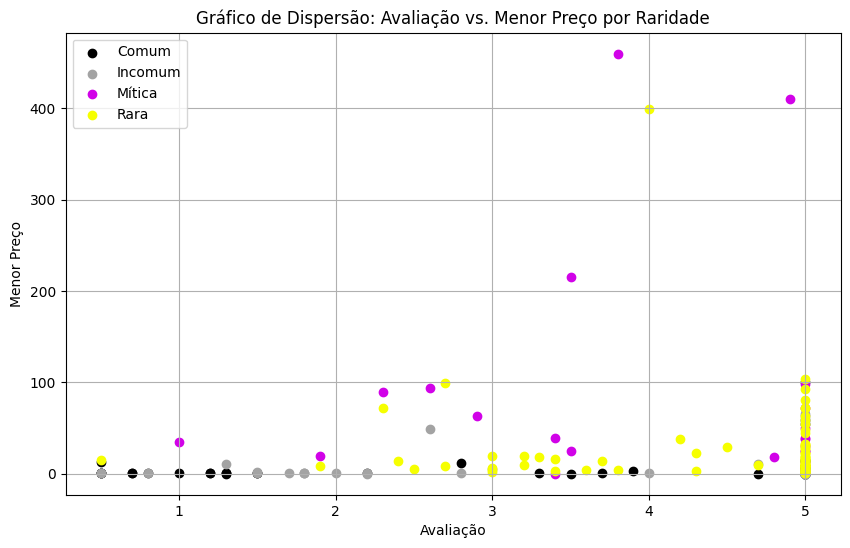

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Definindo as cores com base na raridade
cores = {
    "Comum": "#000000",
    "Incomum": "#a3a3a3",
    "Rara": "#f6ff00",
    "Mítica": "#d102e8",
    "Prática": "orange"
}

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
for raridade, grupo_dados in df.groupby("raridade"):
    plt.scatter(grupo_dados["avaliacao"], grupo_dados["min_preco"], label=raridade, c=cores[raridade])

# Personalizando o gráfico
plt.xlabel("Avaliação")
plt.ylabel("Menor Preço")
plt.title("Gráfico de Dispersão: Avaliação vs. Menor Preço por Raridade")
plt.legend()
plt.grid(True)

# Mostrando o gráfico
plt.show()

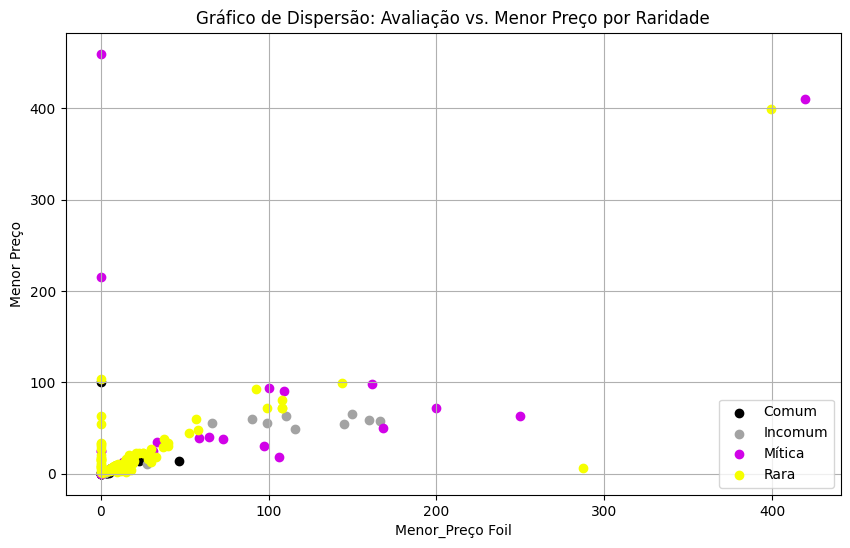

In [47]:

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
for raridade, grupo_dados in df.groupby("raridade"):
    plt.scatter(grupo_dados["min_preco_foil"], grupo_dados["min_preco"], label=raridade, c=cores[raridade])

# Personalizando o gráfico
plt.xlabel("Menor_Preço Foil")
plt.ylabel("Menor Preço")
plt.title("Gráfico de Dispersão: Avaliação vs. Menor Preço por Raridade")
plt.legend()
plt.grid(True)

# Mostrando o gráfico
plt.show()

In [48]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://tarifaluzhora.es/"

soup = BeautifulSoup(requests.get(url).content, "html.parser")

all_data = []
for row in soup.select(".row:not(:has(.row)):has([itemprop=price])"):
    time = row.select_one('[itemprop="description"]')
    price = row.select_one('[itemprop="price"]')

    color = time.find_previous("div")["class"][-1]

    if "high" in color:
        color = "high"
    elif "low" in color:
        color = "low"
    else:
        color = "default"

    all_data.append(
        {
            "Time": time.text,
            "Price": price.text.replace("\n", " "),
            "Color": color,
        }
    )

df = pd.DataFrame(all_data)
print(df)

             Time          Price    Color
0   00:00 - 01:00  0.11291 €/kWh      low
1   01:00 - 02:00  0.09722 €/kWh      low
2   02:00 - 03:00  0.09952 €/kWh      low
3   03:00 - 04:00  0.10998 €/kWh      low
4   04:00 - 05:00  0.10556 €/kWh      low
5   05:00 - 06:00  0.11818 €/kWh  default
6   06:00 - 07:00  0.12618 €/kWh  default
7   07:00 - 08:00  0.13874 €/kWh  default
8   08:00 - 09:00  0.14823 €/kWh  default
9   09:00 - 10:00  0.12094 €/kWh  default
10  10:00 - 11:00  0.14921 €/kWh  default
11  11:00 - 12:00  0.14286 €/kWh  default
12  12:00 - 13:00  0.13709 €/kWh  default
13  13:00 - 14:00  0.12171 €/kWh  default
14  14:00 - 15:00   0.0755 €/kWh      low
15  15:00 - 16:00   0.0774 €/kWh      low
16  16:00 - 17:00  0.07613 €/kWh      low
17  17:00 - 18:00  0.07904 €/kWh      low
18  18:00 - 19:00  0.14065 €/kWh  default
19  19:00 - 20:00  0.15801 €/kWh     high
20  20:00 - 21:00  0.16821 €/kWh     high
21  21:00 - 22:00   0.1948 €/kWh     high
22  22:00 - 23:00   0.1323 €/kWh  

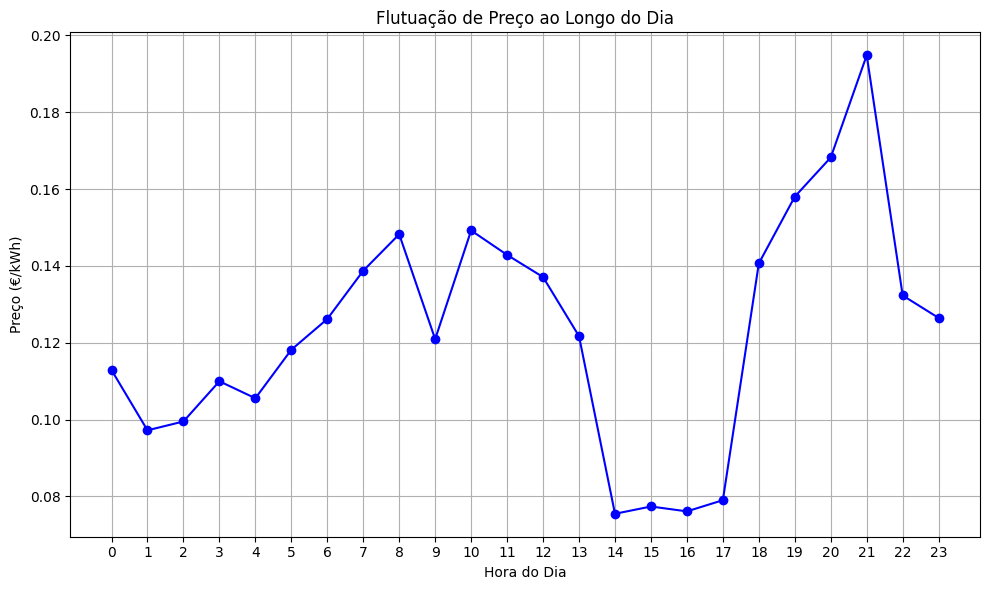

In [50]:
import matplotlib.pyplot as plt

df['Hour'] = df['Time'].str.split(' - ').str[0].str.split(':').str[0].astype(int)

# Converter o intervalo de tempo para horas do dia
df['Hour'] = df['Time'].str.split(' - ').str[0].str.split(':').str[0].astype(int)

# Gráfico de Linhas para Flutuação de Preço ao Longo do Tempo
plt.figure(figsize=(10, 6))
plt.plot(df['Hour'], df['Price'].str.replace(' €/kWh', '').astype(float), marker='o', color='b')
plt.xlabel('Hora do Dia')
plt.ylabel('Preço (€/kWh)')
plt.title('Flutuação de Preço ao Longo do Dia')
plt.xticks(df['Hour'])
plt.grid(True)
plt.tight_layout()
plt.show()

#### 4. Conclusão
Nossa pesquisa apesar de breve trouxe insaghts sobre a dinamica do preço das cartas de magic e no valor da conta de luz durante o dia.
- Gráfico 1. É possível observar no gráfico o comportamento natural de cards melhores avaliados possuirem um preço maior. Mas também se observa um grupo a parte, principalmente de cards raros e míticos, que apesar de não terem avaliação tão alta também possuem um valor alto nos preços comparados aos outros cards com mesma avaliação.
- Gráfico 2. Nenhum insight importante, somente os cards que não possuem valor foil ou normal se destacam no gráfico. Somente é perceptivel uma taxa de valorização maior das cartas foil em relação as noirmais.
- Gráfico 3. É possivel ver um declínio muito alto no valor da conta de luz no período da tarde, momento em que mais pessoas estão na rua.